In [3]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [4]:
# Generating an Auto Regressive Data as we require phi's to make our hypothesis testing to accept or reject 
# the unit root case hence for stationary and non-stationary time series
def generate_ar_process(lags, coefs, length):
    #cast coef to numpy arrays
    coefs = np.array(coefs)
    
    #initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        #previous values of the series
        prev_vals = series[-lags:][::-1]
        
        
        #get new value of the time series
        #mt = phi * mt-k + error
        new_val = np.sum(np.array(prev_vals)*coefs) + np.random.normal()
        
        series.append(new_val)
        
    return np.array(series)


In [5]:
# series is a time series we have prepared above
def perform_adf_test(series):
    result = adfuller(series)
    
    print('ADF Statistic: %f' % result[0])
    # p-value > 0.05 non stationary
    print('p-value: %f' % result[1])

# AR(1) Process

Text(0.5, 1.0, 'Stationary AR(1) Process')

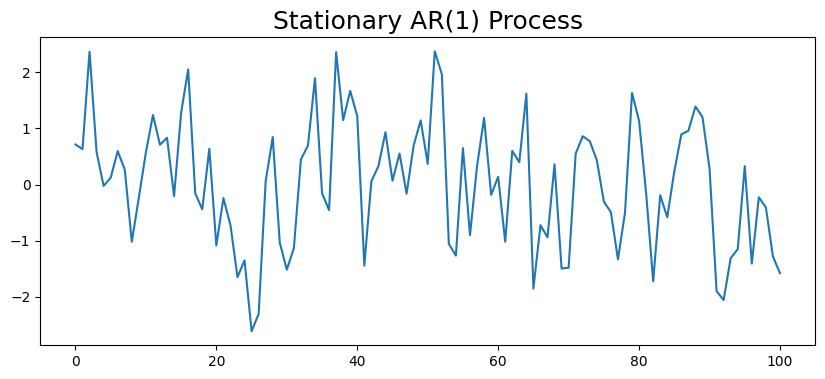

In [8]:
# Stationary
# phi > 1
ar_1_process = generate_ar_process(1, [.5], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title('Stationary AR(1) Process', fontsize=18)

In [9]:
perform_adf_test(ar_1_process)

ADF Statistic: -6.390626
p-value: 0.000000


Still not clear how to accept or reject the Ho i.e accept or reject unit root??

# Non Stationary

Text(0.5, 1.0, 'Non-Stationary AR(1) Process')

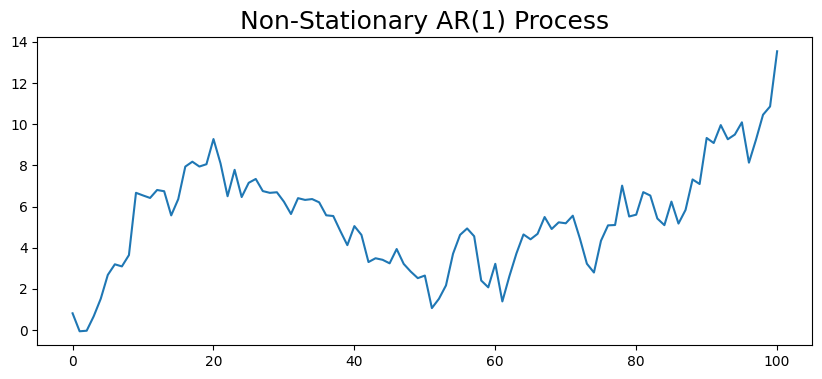

In [11]:
# keeping phi = 1 (unit root)
ar_1_process_unit_root = generate_ar_process(1, [1], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process_unit_root)
plt.title('Non-Stationary AR(1) Process', fontsize=18)

In [12]:
perform_adf_test(ar_1_process_unit_root)

ADF Statistic: -0.508614
p-value: 0.890325


p>0.05 Non-stationary \
Isn't it behaving reverse of p-value test that if p<0.05 then we reject the null hypothesis.

# AR(2) Process
## Stationary

Text(0.5, 1.0, 'Stationary AR(2) Process')

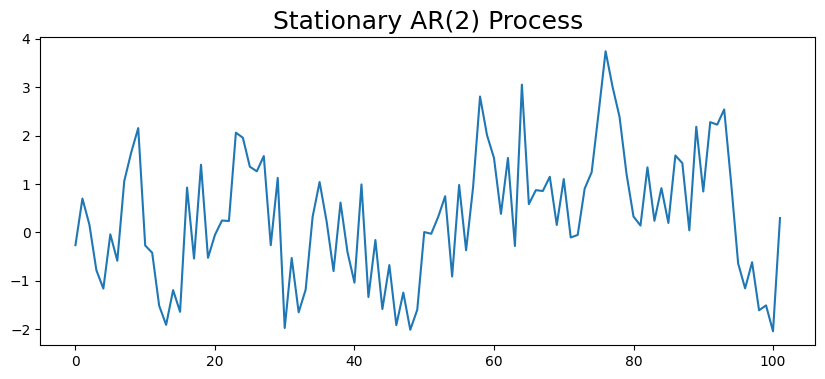

In [13]:
ar_2_process = generate_ar_process(2, [.5, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process)
plt.title('Stationary AR(2) Process', fontsize=18)

In [14]:
perform_adf_test(ar_2_process)

ADF Statistic: -4.199906
p-value: 0.000659


p<0.05 stationary t.s

## Non Stationary

Text(0.5, 1.0, 'Non-Stationary AR(2) Process')

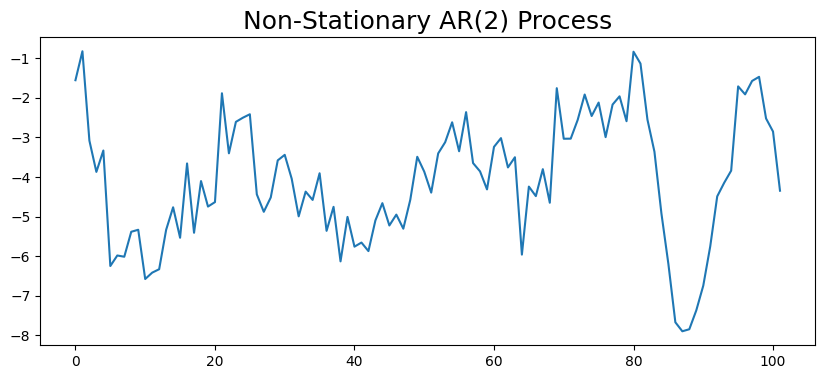

In [11]:
# phi's should sum upto 1 for unit root case
ar_2_process_unit_root = generate_ar_process(2, [0.7,0.3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process_unit_root)
plt.title('Non-Stationary AR(2) Process', fontsize=18)